In [3]:
import pandas as pd

df = pd.read_excel('data/AirQualityUCI.xlsx')

df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [23]:
X = df.drop(['Date', 'Time'], axis=1).reset_index(drop=True)

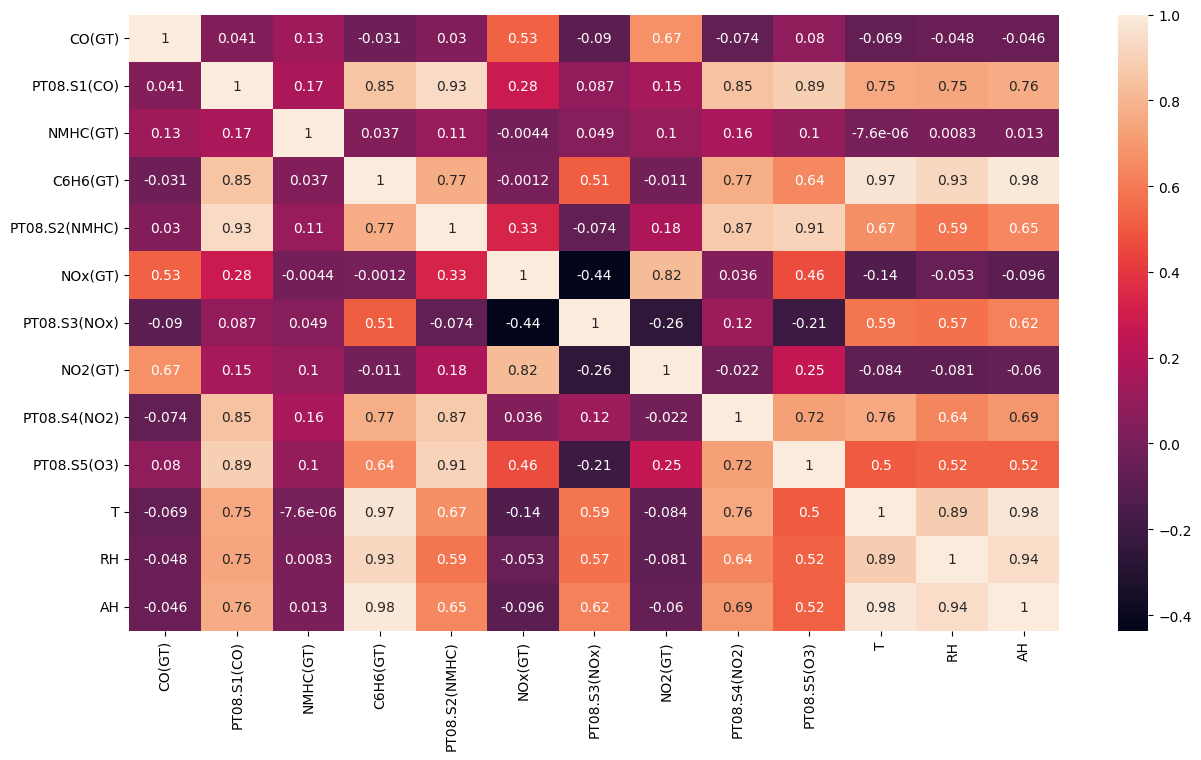

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.heatmap(X.corr(), annot=True)
plt.show()

In [65]:
X = df.drop(['Date', 'Time', 'PT08.S1(CO)'], axis=1).reset_index(drop=True)
y = df['PT08.S1(CO)'].reset_index(drop=True)

In [66]:
from sklearn.svm import SVR

clf = SVR(C=0.1, kernel='linear', gamma=10)

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [69]:
clf.fit(X_train, y_train)

SVR(C=0.1, gamma=10, kernel='linear')

In [70]:
y_pred = clf.predict(X_test)

In [71]:
from sklearn.metrics import r2_score

r_quadrado = r2_score(y_test, y_pred)

In [72]:
print(r_quadrado)

0.9511230535103641
